First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

SVM with linear kernel:
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



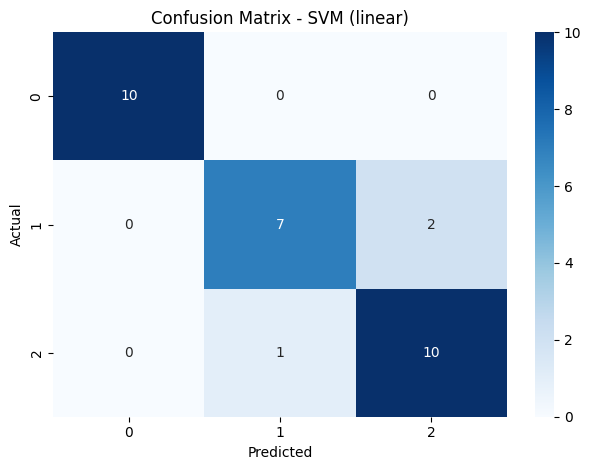

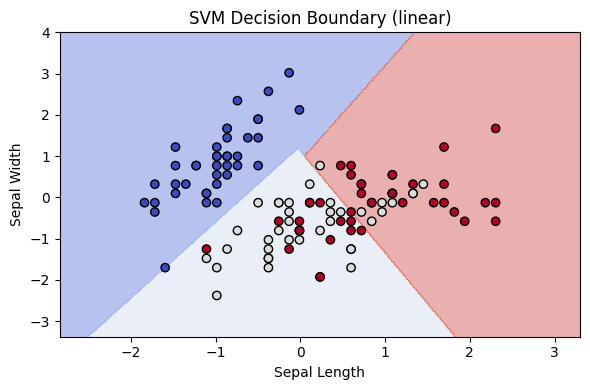


SVM with poly kernel:
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.47      1.00      0.64         9
           2       1.00      0.27      0.43        11

    accuracy                           0.67        30
   macro avg       0.82      0.69      0.65        30
weighted avg       0.84      0.67      0.65        30



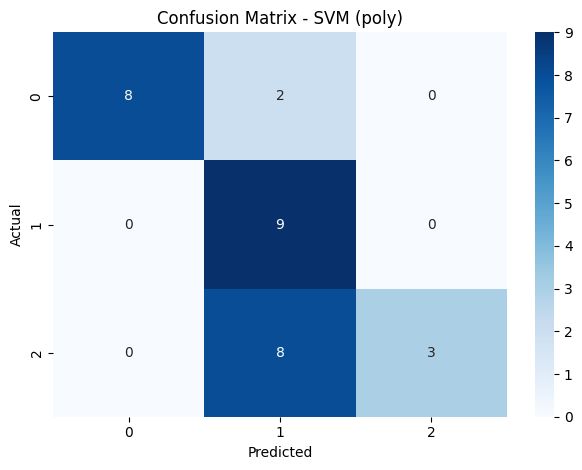

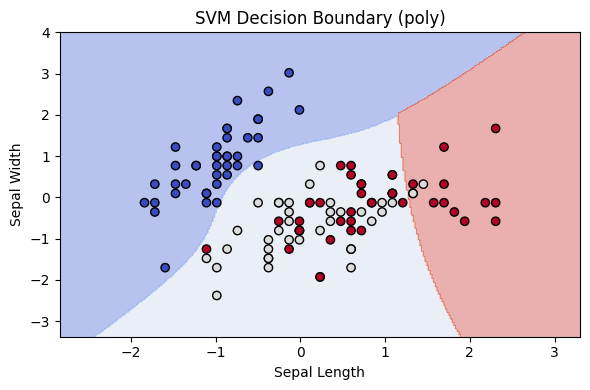


SVM with rbf kernel:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



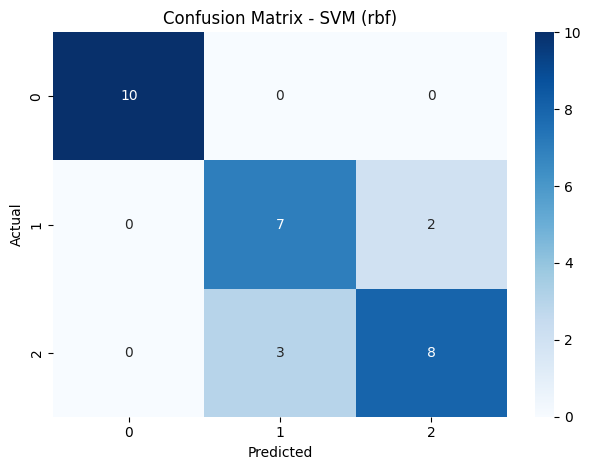

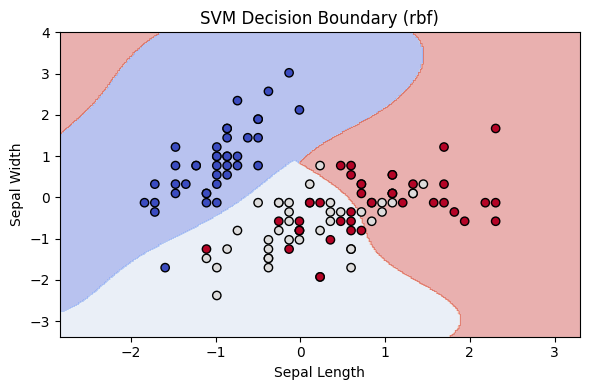


SVM with sigmoid kernel:
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.44      0.53         9
           2       0.64      0.82      0.72        11

    accuracy                           0.77        30
   macro avg       0.77      0.75      0.75        30
weighted avg       0.77      0.77      0.76        30



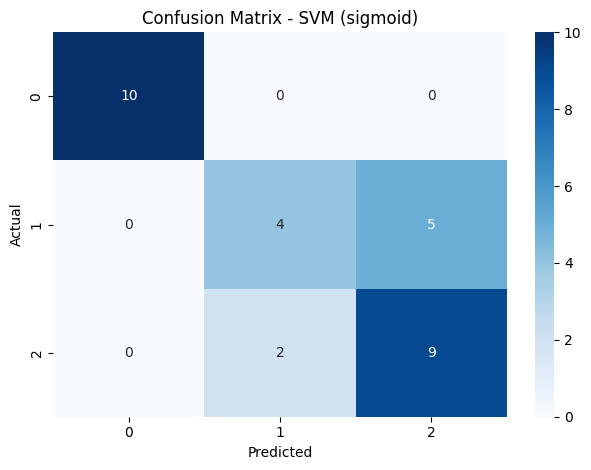

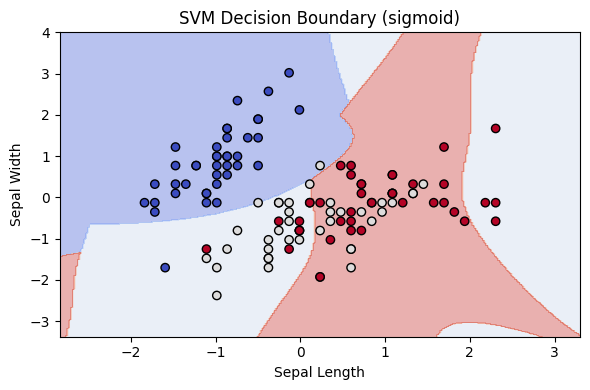


Decision Tree:
Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



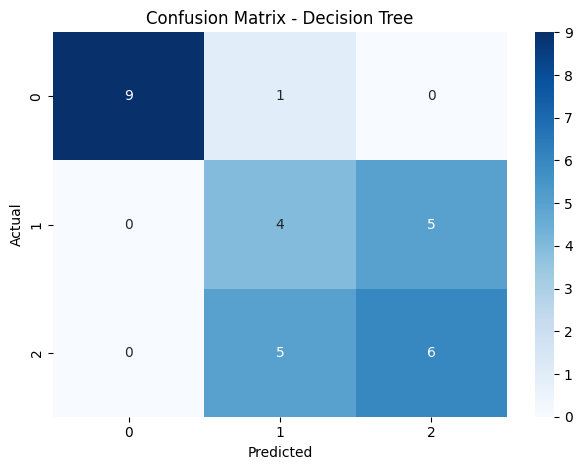

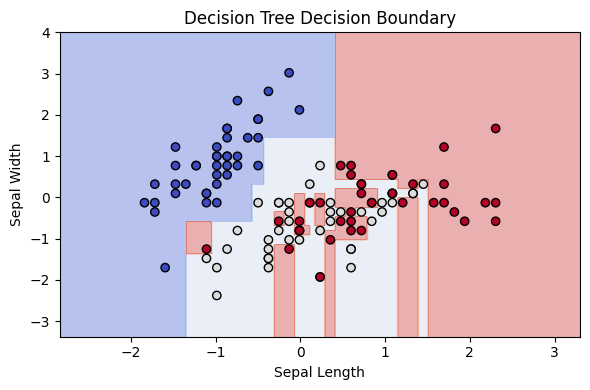


KNN:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



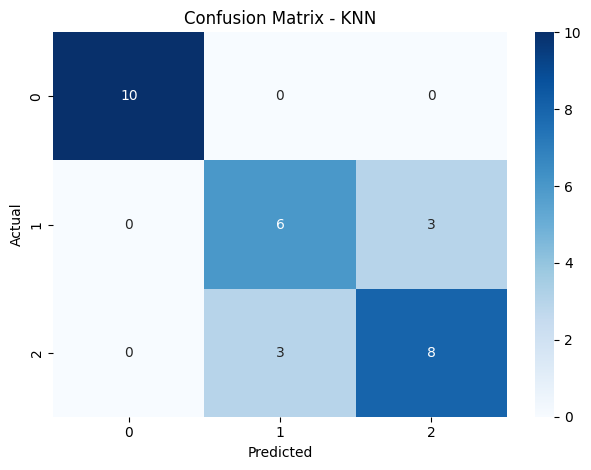

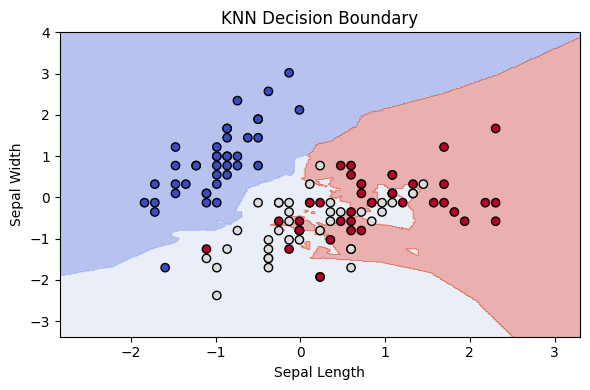


Logistic Regression:
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



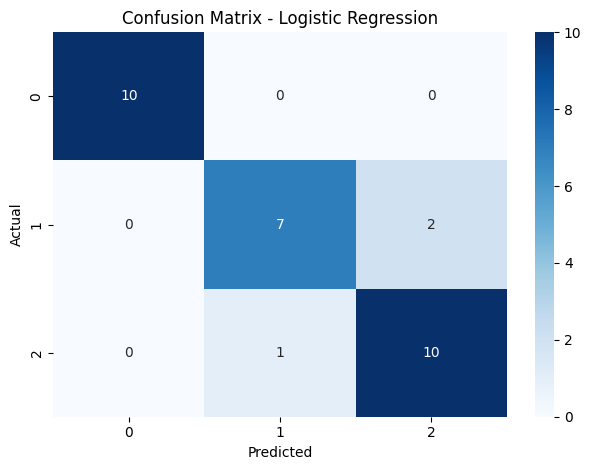

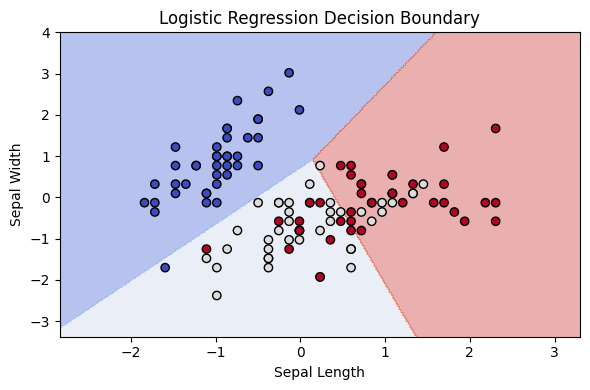

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load dataset from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=columns)

# Step 2: Show first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Encode labels and split features/target
X = df.drop('class', axis=1)
y = LabelEncoder().fit_transform(df['class'])

# Use only first two features for visualization
X_vis = X[['sepal_length', 'sepal_width']]

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Step 5: Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.tight_layout()
    plt.show()

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Step 6: Train and evaluate SVMs with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\nSVM with {kernel} kernel:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    plot_conf_matrix(y_test, y_pred, f"SVM ({kernel})")
    plot_decision_boundary(model, X_train_scaled, y_train, f"SVM Decision Boundary ({kernel})")

# Step 7: Compare with other classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    plot_conf_matrix(y_test, y_pred, name)
    plot_decision_boundary(clf, X_train_scaled, y_train, f"{name} Decision Boundary")
